### sklearn.metrics.accuracy_score
* sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy#sklearn.metrics.accuracy_score

### sklearn.metrics.precision_score
* sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html?highlight=precision_score#sklearn.metrics.precision_score

### sklearn.metrics.recall_score
* sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall_score#sklearn.metrics.recall_score

### sklearn.metrics.confusion_matrix
* sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_#sklearn.metrics.confusion_matrix

### sklearn.metrics.f1_score
* sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [4]:
import pandas as pd

df_titanic = pd.read_csv('./datasets/titanic_train.csv')
df_titanic = df_titanic.loc[:, ['Survived', 'Pclass', 'Sex', 'Age']]
X = df_titanic.drop('Survived', axis=1)
y = df_titanic['Survived']
X['Age'] = X['Age'].fillna(method = 'ffill')


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels = encoder.fit_transform(X['Sex'])
X['Sex'] = labels


from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
age = np.array(X['Age']).reshape(-1, 1)
scaler.fit(age)
age = scaler.transform(age)
X['Age'] = age


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬 : ')
    print(confusion)
    #print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))
    print(f'정확도: {accuracy:^.4f}, 정밀도: {precision:^.4f}, 재현율: {recall:^.4f}, F1: {f1:^.4f}')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬 : 
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424, 재현율: 0.8033, F1: 0.7717


### sklearn.preprocessing.Binarizer
* class sklearn.preprocessing.Binarizer(*, threshold=0.0, copy=True)
> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html?highlight=binarizer#sklearn.preprocessing.Binarizer

In [27]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 concatenate하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])
# :3, 3개만 찍어봤는데, 그 중 오른쪽 값만 가져옴

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.42558527 0.57441473]
 [0.88833758 0.11166242]
 [0.88651722 0.11348278]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.42558527 0.57441473 1.        ]
 [0.88833758 0.11166242 0.        ]
 [0.88651722 0.11348278 0.        ]]


In [35]:
# 앞이 0값의 확률, 뒤가 1값의 확률

# 0.5 말고 thres hold를 0.4로 보고, 오른쪽이 0.4보다 크면 1을 찍음
# [[0.42558527 0.57441473 1.        ]
# [0.88833758 0.11166242 0.        ]
# [0.88651722 0.11348278 0.        ]]
# 위 결과 값에서 1.1을 기준으로 가운데 값이 크면 1을 뱉는다.
# 왼쪽 값 말고 오른쪽 값만 가져와서 binarizer해서 기준 값을 주고 
# thres 값에 따라 0과 1에 차이가 생겨남

from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

# threshold 기준값을 1.1로 잡고, 
# 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [36]:
# Binarizer의 threshold 설정값. 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 변환값의 두 번재 컬럼, 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬 : 
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424, 재현율: 0.8033, F1: 0.7717


In [37]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4 # 임계값 변동, 재현율 오르고 F1 score 떨어졌음
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬 : 
[[94 24]
 [10 51]]
정확도: 0.8101, 정밀도: 0.6800, 재현율: 0.8361, F1: 0.7500


In [40]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60, 0.65]
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)


get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

임곗값 :  0.4
오차 행렬 : 
[[94 24]
 [10 51]]
정확도: 0.8101, 정밀도: 0.6800, 재현율: 0.8361, F1: 0.7500
임곗값 :  0.45
오차 행렬 : 
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.7576
임곗값 :  0.5
오차 행렬 : 
[[101  17]
 [ 12  49]]
정확도: 0.8380, 정밀도: 0.7424, 재현율: 0.8033, F1: 0.7717
임곗값 :  0.55
오차 행렬 : 
[[107  11]
 [ 17  44]]
정확도: 0.8436, 정밀도: 0.8000, 재현율: 0.7213, F1: 0.7586
임곗값 :  0.6
오차 행렬 : 
[[111   7]
 [ 21  40]]
정확도: 0.8436, 정밀도: 0.8511, 재현율: 0.6557, F1: 0.7407
임곗값 :  0.65
오차 행렬 : 
[[116   2]
 [ 28  33]]
정확도: 0.8324, 정밀도: 0.9429, 재현율: 0.5410, F1: 0.6875


위의 결과에서는 뭐가 좋은지 알 수 없음 \
task에 따라 달라짐 \
임곗값 :  0.5 \
오차 행렬 : \
[[101  17] \
 [ 12  49]] \
정확도: 0.8380, 정밀도: 0.7424, 재현율: 0.8033, F1: 0.7717 \
이 제일 좋은듯?

### sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)
> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html?highlight=precision_recall#sklearn.metrics.precision_recall_curve

In [42]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape : ', thresholds.shape)
print('반환된 precisions 배열의 Shape : ', precisions.shape)
print('반환된 recalls 배열의 Shape : ', recalls.shape)

print('thresholds 5 sample : ', thresholds[:5])
print('precisions 5 sample : ', precisions[:5])
print('recalls 5 sample : ', recalls[:5])

반환된 분류 결정 임곗값 배열의 Shape :  (124,)
반환된 precisions 배열의 Shape :  (125,)
반환된 recalls 배열의 Shape :  (125,)
thresholds 5 sample :  [0.06556004 0.07136752 0.0776467  0.07896181 0.08303016]
precisions 5 sample :  [0.34078212 0.34269663 0.34659091 0.35057471 0.35465116]
recalls 5 sample :  [1. 1. 1. 1. 1.]


In [43]:
thresholds

array([0.06556004, 0.07136752, 0.0776467 , 0.07896181, 0.08303016,
       0.08728826, 0.09023575, 0.09174288, 0.0932726 , 0.09482516,
       0.09640082, 0.09799983, 0.09962244, 0.10126889, 0.10293945,
       0.10463435, 0.10549101, 0.10635385, 0.1080982 , 0.10897977,
       0.10986764, 0.11166242, 0.11348278, 0.11532897, 0.11720121,
       0.12102485, 0.12297671, 0.12495557, 0.12696167, 0.12899523,
       0.13105647, 0.13314561, 0.16046644, 0.16410501, 0.16543706,
       0.16796832, 0.16860594, 0.16916563, 0.17698847, 0.18235972,
       0.1934803 , 0.20215395, 0.21111466, 0.22036286, 0.22828902,
       0.22989812, 0.23641383, 0.23971912, 0.24305591, 0.25325415,
       0.25671573, 0.26728473, 0.27448237, 0.28179929, 0.2892335 ,
       0.2929939 , 0.30625679, 0.31014194, 0.32009565, 0.32996465,
       0.35678797, 0.3609806 , 0.36717731, 0.39293006, 0.39728508,
       0.41044558, 0.41486206, 0.44162529, 0.45966787, 0.47327218,
       0.48009052, 0.48386633, 0.48691629, 0.50057993, 0.50513

In [44]:
precisions

array([0.34078212, 0.34269663, 0.34659091, 0.35057471, 0.35465116,
       0.35672515, 0.36094675, 0.36309524, 0.36526946, 0.36746988,
       0.36969697, 0.37654321, 0.38125   , 0.3836478 , 0.39102564,
       0.39215686, 0.39473684, 0.39735099, 0.4       , 0.39864865,
       0.40136054, 0.40689655, 0.4084507 , 0.41726619, 0.41605839,
       0.42222222, 0.43076923, 0.448     , 0.4516129 , 0.45901639,
       0.46666667, 0.47058824, 0.47863248, 0.48275862, 0.48695652,
       0.49122807, 0.49107143, 0.4954955 , 0.5       , 0.50925926,
       0.51401869, 0.51886792, 0.52380952, 0.52884615, 0.53398058,
       0.53921569, 0.55      , 0.55555556, 0.56122449, 0.56701031,
       0.57291667, 0.58510638, 0.59782609, 0.61797753, 0.625     ,
       0.63218391, 0.63953488, 0.64705882, 0.6547619 , 0.6626506 ,
       0.67073171, 0.66666667, 0.6625    , 0.66666667, 0.67532468,
       0.68      , 0.68918919, 0.69444444, 0.70422535, 0.7       ,
       0.71014493, 0.72058824, 0.73134328, 0.74242424, 0.73846

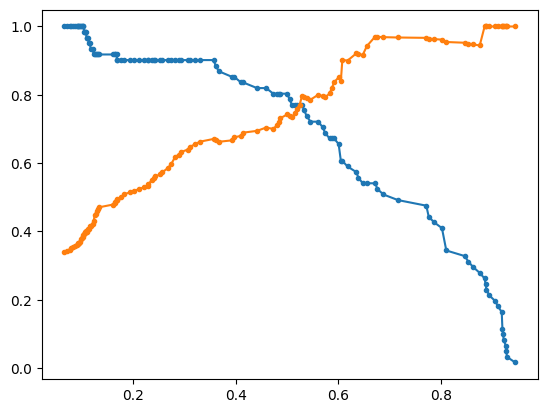

In [49]:
import matplotlib.pyplot as plt

plt.plot(thresholds, recalls[0:124], marker = '.', label='Recall')
plt.plot(thresholds, precisions[0:124], marker = '.', label='Precision')
plt.legend
plt.show()

### sklearn.metrics.roc_curve
* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_curve#sklearn.metrics.roc_curve

In [51]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5 step을 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임계값 : ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66]
샘플 index로 추출한 임계값 :  [0.95 0.81 0.65 0.6  0.55 0.47 0.4  0.27 0.18 0.13 0.12 0.11 0.1  0.08]
샘플 임계값별 FPR :  [0.    0.008 0.025 0.059 0.102 0.178 0.212 0.314 0.466 0.542 0.678 0.754
 0.839 0.941]
샘플 임계값별 TPR :  [0.016 0.344 0.541 0.656 0.721 0.803 0.852 0.902 0.902 0.918 0.934 0.967
 1.    1.   ]


In [58]:
thresholds.shape

(69,)

In [56]:
np.arange(1, 69, 5) # threshold index 를 일정 값으로 띄워서 찍어본 것

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66])

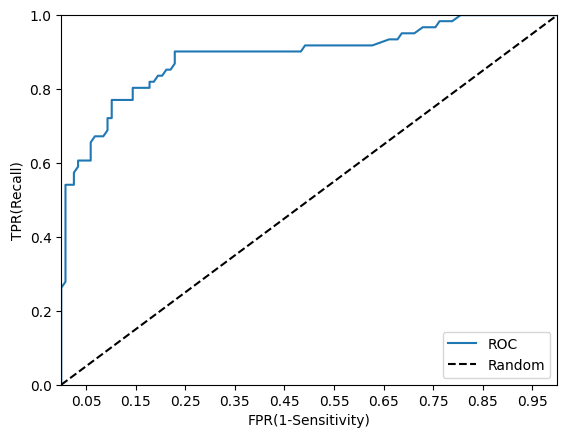

In [54]:
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.plot(fprs, tprs, label = 'ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0, 1); plt.ylim(0, 1)
plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score

# pred = lr_clf.predict(X_test)
# roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.8900


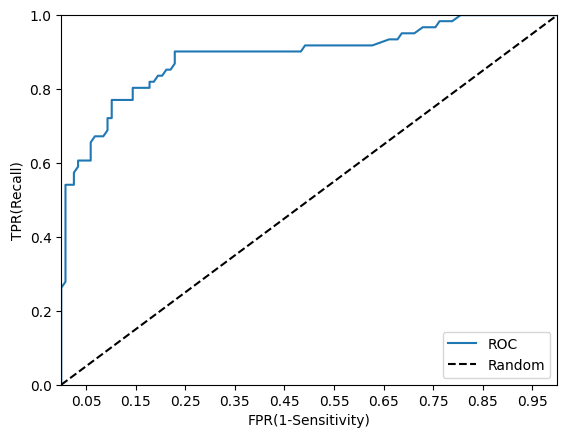

In [59]:
# 함수로

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    # FPR X축의 scale을 0.1 단위로 변경, X, Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, pred_proba_class1)